In [8]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from helpers import loadData, loadDataFromPath

In [9]:
#Load the training and test data
X_tr, Y_tr = loadData("train")
X_va, Y_va = loadData("test")

In [28]:
# Define the individual models
models_list = []

# Define Model 1
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10))
models_list.append(model1)

# Define Model 2
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(10))
models_list.append(model2)

# Define Model 3
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(10))
models_list.append(model3)

'''
WE CAN USE THIS MODEL4. RUNS SLOW BUT MIGHT INCREASE ACCURACY DEPENDING ON MY RESEARH
model1 = models.Sequential()
model1.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(10))

'''

In [29]:
# Define the ensemble model
input_layer = layers.Input(shape=(32, 32, 3))
outputs = [model(input_layer) for model in models_list]
ensemble_output = layers.Average()(outputs)
ensemble_model = models.Model(inputs=input_layer, outputs=ensemble_output)

# Compile the model
ensemble_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
# Train the model
ensemble_model.fit(X_tr, Y_tr, epochs=10, validation_data=(X_va, Y_va))

Epoch 1/10
2290/2290 [==============================] - 122s 52ms/step - loss: 0.7522 - accuracy: 0.7646 - val_loss: 0.4776 - val_accuracy: 0.8619
Epoch 2/10
2290/2290 [==============================] - 123s 54ms/step - loss: 0.3817 - accuracy: 0.8890 - val_loss: 0.4200 - val_accuracy: 0.8806
Epoch 3/10
2290/2290 [==============================] - 126s 55ms/step - loss: 0.3123 - accuracy: 0.9081 - val_loss: 0.3490 - val_accuracy: 0.8989
Epoch 4/10
2290/2290 [==============================] - 122s 53ms/step - loss: 0.2682 - accuracy: 0.9218 - val_loss: 0.3346 - val_accuracy: 0.9073
Epoch 5/10
2290/2290 [==============================] - 122s 53ms/step - loss: 0.2304 - accuracy: 0.9324 - val_loss: 0.3341 - val_accuracy: 0.9111
Epoch 6/10
2290/2290 [==============================] - 120s 53ms/step - loss: 0.1997 - accuracy: 0.9415 - val_loss: 0.3412 - val_accuracy: 0.9098
Epoch 7/10
2290/2290 [==============================] - 129s 57ms/step - loss: 0.1687 - accuracy: 0.9498 - val_loss: 0

In [36]:
test_loss, test_acc = ensemble_model.evaluate(X_va, Y_va, verbose=2)
print("Ensemble test accuracy: {}".format(test_acc))

814/814 - 8s - loss: 0.4690 - accuracy: 0.9070 - 8s/epoch - 10ms/step
Ensemble test accuracy: 0.906960666179657


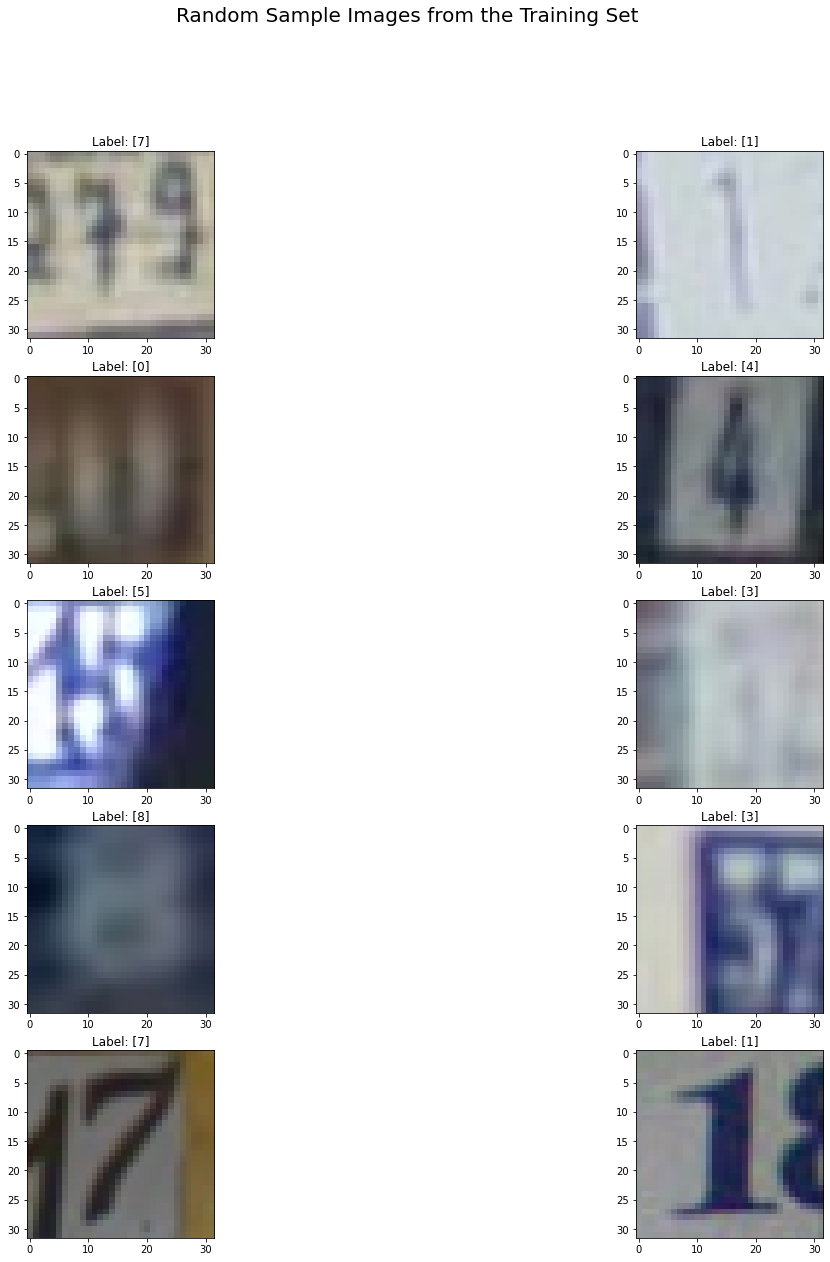

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of images to display
num_images = 10

# Randomly select `num_images` samples from the training set
sample_indices = np.random.choice(X_tr.shape[0], size=num_images, replace=False)

# Create a grid of subplots to display the images
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))

# Iterate through the subplots and display each image
for i, ax in enumerate(axes.flat):
    image = X_tr[sample_indices[i]]
    label = Y_tr[sample_indices[i]]
    ax.imshow(image)
    ax.set_title(f"Label: {label}")
    
# Set the title for the entire plot
plt.suptitle("Random Sample Images from the Training Set", fontsize=20)

# Display the plot
plt.show()